# Case Study - Breast Cancer Wisconsin (Part 2) 

+ stable DT와 stable CRI의 코드입니다.  
+ 다른 알고리즘들은 강의자료-실습코드나 scikit-learn tutorial, kaggle 등을 참고하시기 바랍니다.
+ `/modules`에 코드 파일이 들어있습니다. 현재 작업하시는 `.ipynb` 파일의 경로에 첨부한 압축파일을 그대로 풀어주시면 됩니다.
+ 프로그래밍에 능숙한 개발자가 코딩한 것이 아니므로 여러가지 오류가 일어날 수 있는 점 양해 부탁드리며, 오류에 대해서는 문의주시면 감사하겠습니다.

## 1. Stable DT
+ DT의 불안정성
    - data에 조금만 변화가 일어나도 결과가 극적으로 바뀔 수 있음
    - 결과가 자주, 극적으로 바뀐다면 해석적 관점에서 결과를 신뢰하기 힘듬
+ stable DT
    - node level stabilizing
        - node에서 분기 시 N번 bootstrap sampling
        - N개 분기 조건 중 최빈 선택
    - 모든 분기에서 node level stabilizing을 이용해 재귀적 분할
    - 범주형 변수는 숫자로 바꿔주는 전처리를 해도 되고, 안해도 됩니다.
+ DT 사용 시 scikit-learn 대신 첨부한 stable DT를 사용해주시고, 발표 시 stable DT를 사용했다고 적어주시길 바랍니다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from modules.stableDT import stableDecisionTree # file 제공
from modules.stableDT import visualize_tree # file 제공

### 1.1 Load dataset

In [27]:
data = pd.read_csv('BC_preprocessed.csv')

In [28]:
data.columns

Index(['Clump_Thickness', 'Uniformity_of_Cell_Size',
       'Uniformity_of_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [29]:
data.dropna(inplace=True)

In [30]:
from sklearn.model_selection import train_test_split
dataset = data.copy()
target_name = 'Class' # target name을 꼭 입력해주시길 바랍니다.
colnm = dataset.columns
X = dataset.loc[:,colnm [colnm != target_name]]
y = dataset.loc[:, target_name]

In [31]:
X = data[['Clump_Thickness', 'Uniformity_of_Cell_Size',
       'Uniformity_of_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses']].copy()
y = data[target_name].copy()

In [32]:
from sklearn.model_selection import train_test_split

# training : test 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1333)

### 1.2 Fitting
+ params
    - max_depth : 최대 깊이
    - min_sample : 리프 노드의 최소 샘플 수
    - impurity_meausre : gini, entropy
    - iter_num : 각 노드에서 리샘플링 횟수. default = 30. 데이터가 많아서 오래 걸린다면 iter_num을 줄일 것
+ 보통의 경우, 별 다른 제약 없이 min_sample만 training dataset의 3%로 설정하고 수행

In [33]:
min_sample_ratio = 0.03 # 최소 샘플 수로 dataset의 샘플 수의 3%
max_depth = 4
impurity_measure='entropy'
iter_num=3

clf = stableDecisionTree(
    min_sample = min_sample_ratio*len(X), 
    iter_num = iter_num,
    max_depth=max_depth,
    impurity_measure = impurity_measure)
clf.fit(X,y)

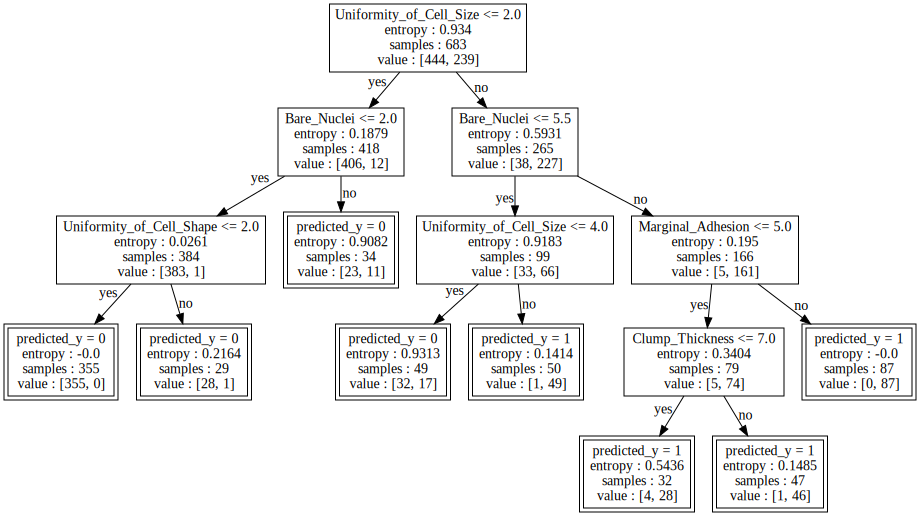

In [34]:
# images
visualize_tree(clf.root)

### 1.3 Results
+ predictive performance
+ text
+ image

In [35]:
# predictive performance
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

pred_y = clf.predict(X_test)
acc = accuracy_score(y_test,pred_y)
f1 = f1_score(y_test, pred_y, average='macro')
acc, f1

(0.948905109489051, 0.9441435144737609)

In [36]:
# confusion matrix
cm = confusion_matrix(y_test, pred_y)
print(cm)

[[85  2]
 [ 5 45]]


In [37]:
# exporting rules to text
clf.export_text()

IF Uniformity_of_Cell_Size > 2.0 AND Bare_Nuclei > 5.5 AND Marginal_Adhesion > 5.0 THEN y = 1
IF Uniformity_of_Cell_Size > 2.0 AND Bare_Nuclei > 5.5 AND Marginal_Adhesion <= 5.0 AND Clump_Thickness > 7.0 THEN y = 1
IF Uniformity_of_Cell_Size > 2.0 AND Bare_Nuclei > 5.5 AND Marginal_Adhesion <= 5.0 AND Clump_Thickness <= 7.0 THEN y = 1
IF Uniformity_of_Cell_Size > 2.0 AND Bare_Nuclei <= 5.5 AND Uniformity_of_Cell_Size > 4.0 THEN y = 1
IF Uniformity_of_Cell_Size > 2.0 AND Bare_Nuclei <= 5.5 AND Uniformity_of_Cell_Size <= 4.0 THEN y = 0
IF Uniformity_of_Cell_Size <= 2.0 AND Bare_Nuclei > 2.0 THEN y = 0
IF Uniformity_of_Cell_Size <= 2.0 AND Bare_Nuclei <= 2.0 AND Uniformity_of_Cell_Shape > 2.0 THEN y = 0
IF Uniformity_of_Cell_Size <= 2.0 AND Bare_Nuclei <= 2.0 AND Uniformity_of_Cell_Shape <= 2.0 THEN y = 0


In [38]:
from sklearn.tree import DecisionTreeClassifier

max_depth = 5
dt = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=0.03, max_depth=max_depth)
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=0.03)

In [39]:
X_train.shape[0]*0.01

5.46

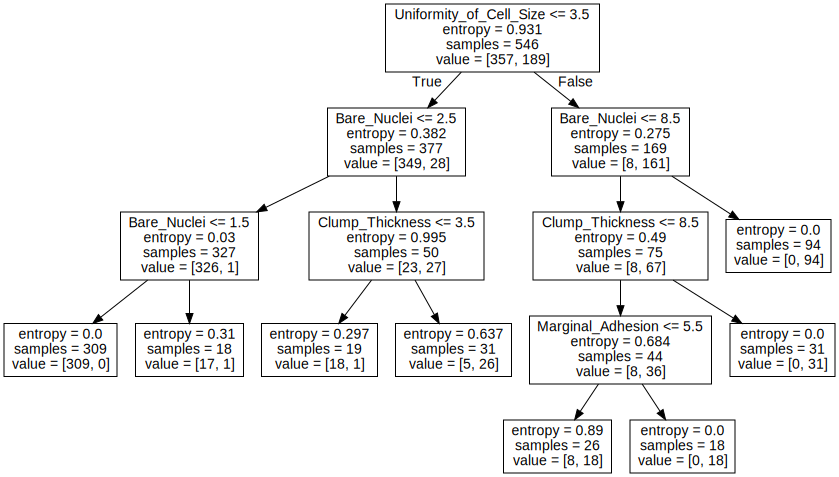

In [40]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=X.columns,
                     filled=False, rounded=False,  
                     special_characters=False)  
graph = graphviz.Source(dot_data)  
graph 

## 2. Stable CRI

+ concise rule induction의 stable 버전

### 2.1 Dataset
+ fitting 시 X,y가 다 포함된 dataset과 target name을 넣어야함

In [43]:
from modules.stableCRI import stable_concise_rule_induction # file 제공

dataset = data.copy()
target_name = 'Class' # target name을 꼭 입력해주시길 바랍니다.
colnm = dataset.columns
X = dataset.loc[:,colnm [colnm != target_name]]
y = dataset.loc[:, target_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

In [51]:
from modules.stableCRI import stable_concise_rule_induction # file 제공

# Concatenating X,y -> training dataset([X_train,y_train]), test dataset([X_test,y_test]) 
train_idx, test_idx = X_train.index, X_test.index
df_train, df_test = dataset.loc[train_idx,:], dataset.loc[test_idx,:]

### 2.2 Fitting
+ params
    - min_samples : OSM 트리에서 리프 노드의 min_samples
    - max_depth : OSM 트리의 max depth
    - rule_rate : rule generation 시 rule들이 커버할 training dataset의 비율 (concise 후에는 달라질 수 있음)
    - iter_num : node에서 rule 유도 시 리샘플링 횟수 
    - target_name : 목표 변수의 column명
+ 범주형 변수는 숫자로 바꿔주는 전처리를 해도 되고, 안해도 됨
+ 매우 느립니다. 어쩌면 하루가 넘게 걸릴 수도 있습니다.
+ 실행이 오래 걸린다면 iter_num을 낮춰서 해보시기 바랍니다. 실행이 너무 오래 걸린다면 데이터셋을 잘 줄여서 해보시기 바랍니다.
+ 실행 시간이 오래 소요되지 않는다면 별 다른 제약 없이 min_samples만 training dataset의 3%로 설정하고 수행 

In [52]:
df_train.columns

Index(['Clump_Thickness', 'Uniformity_of_Cell_Size',
       'Uniformity_of_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [54]:
target_name = 'Class'
min_sample_ratio = 0.01
min_samples = round(min_sample_ratio * len(df_train))
max_depth = 10 # 처음에는 2 또는 3으로 설정해서 돌려보고, 소요시간을 체크해보시기 바랍니다.

cri = stable_concise_rule_induction(min_samples = min_samples, max_depth = max_depth)
cri.fit(data = df_train, target_name = target_name, iter_num = 3, rule_rate = 0.9, resample_ratio=0.9) 

이거뜨면안됨
이거뜨면안됨
이거뜨면안됨


### 2.3 Results

In [55]:
# predictive performance
# f1 : macro-averaging for multiclass
pred_y, acc, f1 = cri.predict(df_test)
acc,f1

(0.9562, 0.9519)

In [30]:
# confusion matrix
cm = confusion_matrix(y_test, pred_y)
print(cm)

[[245   3]
 [ 40   6]]


In [56]:
# rules
cri.export_text()

IF ['Uniformity_of_Cell_Shape < 1.5'] THEN Class = 0   (homogeneity = 0.9963 , coverage = 0.5 )
IF ['Uniformity_of_Cell_Shape >= 1.5', 'Bland_Chromatin >= 4.5'] THEN Class = 1   (homogeneity = 0.9699 , coverage = 0.5 )
IF ['Uniformity_of_Cell_Size >= 4.5'] THEN Class = 1   (homogeneity = 0.9859 , coverage = 0.2601 )


In [57]:
cri.df_concise_rule

,0,1,2
Rule,Uniformity_of_Cell_Shape < 1.5,Uniformity_of_Cell_Size >= 4.5,"Uniformity_of_Cell_Shape >= 1.5, Bland_Chromat..."
pred_y,0,1,1
Homogeneity,0.9963,0.9859,0.9699
Coverage,0.5,0.2601,0.5
# of condition,1.0,1.0,2.0


In [58]:
# dataset not included in rules
cri.others_df

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
394,2,3,2,2,2,2,3,1,1,0
244,6,3,3,5,3,10,3,5,3,0
630,1,2,2,1,2,1,1,1,1,0
600,4,1,3,1,2,1,2,1,1,0
342,5,3,3,1,3,3,3,3,3,1
...,...,...,...,...,...,...,...,...,...,...
537,3,2,2,2,2,1,4,2,1,0
609,3,1,3,1,3,4,1,1,1,0
380,1,2,3,1,2,1,2,1,1,0
257,5,1,4,1,2,1,3,2,1,0


### rule relation
+ part 3, rule relation은 이번 주에 최대한 정리가 되는대로 올릴 예정인데요. 올린다 하여도 사용성이 매우 낮거나 아니면 올리지 못 할 수도 있습니다. 따라서 rule relation 계산들은 미리 진행하시는 것이 좋을 것 같습니다.